In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import sys
from io import StringIO

In [2]:
data_dir = "./latexData/metrics"

# List all files in the directory
files = os.listdir(data_dir)

print("Files in directory:", files)

Files in directory: ['20250604', 'metrics_0006_ROSE_2025-04-15T11-27-37.json', 'metrics_0006_selfdrivingCar_2025-04-15T11-30-13.json', 'metrics_0008_ROSE_2025-04-15T11-33-28.json', 'metrics_0012_Broadcast_2025-04-15T22-48-21.json', 'metrics_0013_HandcraftedMotor_2025-04-15T11-43-07.json', 'metrics_0021_ROSE_2025-04-15T11-45-51.json', 'metrics_0026_ROSE_2025-04-15T11-49-10.json', 'metrics_0122_Singulate_2025-04-15T11-59-55.json', 'metrics_S_0025_Dense_2025-04-15T12-15-50.json', 'metrics_S_0025_Sparse_2025-04-15T12-18-26.json', 'metrics_S_0050_Dense_2025-04-15T12-24-12.json', 'metrics_S_0050_Sparse_2025-04-15T13-18-20.json', 'metrics_S_0075_Dense_2025-04-15T13-24-01.json', 'metrics_S_0075_Sparse_2025-04-15T15-47-05.json', 'metrics_S_0100_Dense_2025-04-15T15-38-27.json', 'metrics_S_0100_Sparse_2025-04-15T14-21-39.json', 'metrics_S_0150_Dense_2025-04-15T13-57-00.json', 'metrics_S_0150_Sparse_2025-04-15T14-16-47.json']


In [3]:
def get_df(filename: str) -> pd.DataFrame:

    # Read the json file to a dictionary
    # Inside the json file, there is a csvSummary key, which contains the csv file
    # Furthermore we need the data set information, e.g.:
    # "dataset": {
    #     "title": "MotorControlSystem",
    #     "description": "Metrics results for multiple visualizations",
    #     "timestamp": "2025-04-03T23-31-24",
    #     "nodeCount": 13,
    #     "connectionCount": 15,
    #     "visualizationCount": 13
    # },

    # Cols we want to have:
    # Visualization Name
    # Visualization Type
    # Data title
    # One col for each metric

    data = {}

    with open(os.path.join(data_dir, filename), 'r') as f:
        data = f.read()
        # Parse the json data
        data = json.loads(data)

    df_data = []

    for vis_key in data["visualizations"]:
        vis = data["visualizations"][vis_key]
        vis_data = dict()

        # Get the visualization name and type
        vis_data["name"] = vis["name"]
        vis_data["type"] = vis["type"]

        v_type: str = vis["type"]
        v_name: str = vis["name"]
        if v_type == "viscom":
            if "comm" in v_name.lower():
                vis_data["type"] = "viscomComm"
            elif "virtual" in v_name.lower():
                vis_data["type"] = "viscomVirtual"
            else:
                vis_data["type"] = "viscomDefault"

        if v_type.lower() == "fdg":
            vis_data["type"] = "FDG"
            

        # Get the metrics for this visualization
        for metric in vis["metrics"]:
            vis_data[metric] = vis["metrics"][metric]["value"]
            # vis_data["metric_type"] = vis["metrics"][metric]["definition"]["optimum"]

        df_data.append(vis_data)

    df = pd.DataFrame(df_data)

    # csv_summary = data.get("csvSummary")
    # if csv_summary is None:
    #     raise ValueError(f"csvSummary not found in {filename}")

    # # Pass csv_summary as buffer to pandas read_csv
    # csv_buffer = StringIO(csv_summary)
    # df = pd.read_csv(csv_buffer, sep=",")

    df["title"] = data["dataset"]["title"]
    df["nodes"] = data["dataset"]["nodeCount"]
    df["connections"] = data["dataset"]["connectionCount"]
    df["synthetic"] = data["dataset"]["isSynthetic"]

    return df


In [4]:
len(files)

19

In [5]:
# df = get_df(files[0])
# df

In [6]:
# df["name"].nunique()

In [7]:
concatenated_df: pd.DataFrame = None # type: ignore

for file in files:
    
    # Skip the file if it is a directory
    if os.path.isdir(file):
        continue
    
    # Check if the file is a json file
    if not file.endswith(".json"):
        continue
    
    df = get_df(file)
    print(f"File: {file}, Rows: {len(df)}")
    if concatenated_df is None:
        concatenated_df = df
    else:
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

concatenated_df

File: metrics_0006_ROSE_2025-04-15T11-27-37.json, Rows: 48
File: metrics_0006_selfdrivingCar_2025-04-15T11-30-13.json, Rows: 48
File: metrics_0008_ROSE_2025-04-15T11-33-28.json, Rows: 48
File: metrics_0012_Broadcast_2025-04-15T22-48-21.json, Rows: 48
File: metrics_0013_HandcraftedMotor_2025-04-15T11-43-07.json, Rows: 48
File: metrics_0021_ROSE_2025-04-15T11-45-51.json, Rows: 48
File: metrics_0026_ROSE_2025-04-15T11-49-10.json, Rows: 48
File: metrics_0122_Singulate_2025-04-15T11-59-55.json, Rows: 48
File: metrics_S_0025_Dense_2025-04-15T12-15-50.json, Rows: 48
File: metrics_S_0025_Sparse_2025-04-15T12-18-26.json, Rows: 48
File: metrics_S_0050_Dense_2025-04-15T12-24-12.json, Rows: 48
File: metrics_S_0050_Sparse_2025-04-15T13-18-20.json, Rows: 48
File: metrics_S_0075_Dense_2025-04-15T13-24-01.json, Rows: 48
File: metrics_S_0075_Sparse_2025-04-15T15-47-05.json, Rows: 48
File: metrics_S_0100_Dense_2025-04-15T15-38-27.json, Rows: 48
File: metrics_S_0100_Sparse_2025-04-15T14-21-39.json, Rows:

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2966520477.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)


,name,type,aspectRatio,edgeCrossings,totalEdgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,totalPathLength,title,nodes,connections,synthetic
0,viscom_Default,viscomDefault,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,6,101,False
1,viscom_CommWoRot,viscomComm,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,6,101,False
2,viscom_CommWRot,viscomComm,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,6,101,False
3,viscom_Virtual,viscomVirtual,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,6,101,False
4,viscom_DefaultCloser,viscomDefault,0.930575,0.500000,6.0,1.0,0.996125,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,924.011405,0006_ROSE,6,101,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,spaceFilling_Setting_92,spaceFilling,0.926152,0.016292,232.0,1.0,1.000000,0.175677,0.383405,0.378227,0.457803,0.998894,0.999732,31641.902360,S_0150_Sparse,150,173,True
860,spaceFilling_Setting_93,spaceFilling,0.925428,0.019312,275.0,1.0,1.000000,0.176892,0.543234,0.540135,0.601061,0.999723,1.000000,104662.780769,S_0150_Sparse,150,173,True
861,spaceFilling_Setting_94,spaceFilling,0.998544,0.005056,72.0,1.0,1.000000,0.179129,0.309322,0.313733,0.314799,0.994745,0.995973,16868.461987,S_0150_Sparse,150,173,True
862,spaceFilling_Setting_95,spaceFilling,0.998903,0.010534,150.0,1.0,1.000000,0.174186,0.380601,0.380010,0.388864,0.999210,0.999732,45356.230905,S_0150_Sparse,150,173,True


In [8]:
print(len(concatenated_df))
concatenated_df.columns

864


Index(['name', 'type', 'aspectRatio', 'edgeCrossings', 'totalEdgeCrossings',
       'pathEfficiencyRatio', 'pathEfficiencyRatioNormalized', 'stress',
       'pathContinuity', 'weightedPathContinuity', 'pathAngularPrediction',
       'nodeEdgeOverlaps', 'nodeNodeOverlaps', 'totalPathLength', 'title',
       'nodes', 'connections', 'synthetic'],
      dtype='object')

In [9]:
concatenated_df.groupby("type").count()

,name,aspectRatio,edgeCrossings,totalEdgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,totalPathLength,title,nodes,connections,synthetic
type,,,,,,,,,,,,,,,,,
FDG,162,162,162,162,162,162,162,162,162,153,162,162,162,162,162,162,162
arc,54,54,54,54,54,54,54,54,54,51,54,54,54,54,54,54,54
graphviz,54,54,54,54,54,54,54,54,54,51,54,54,54,54,54,54,54
radial,126,126,123,123,126,126,126,126,126,119,126,126,126,126,126,126,126
spaceFilling,252,252,252,252,252,252,252,252,252,238,252,252,252,252,252,252,252
viscomComm,108,108,108,108,108,108,108,108,108,102,108,108,108,108,108,108,108
viscomDefault,54,54,54,54,54,54,54,54,54,51,54,54,54,54,54,54,54
viscomVirtual,54,54,54,54,54,54,54,54,54,51,54,54,54,54,54,54,54


In [10]:
columns_to_filter_out = [
    "name",
    "nodes",
    "connections",
]

relevant_df = concatenated_df.copy()
for col in columns_to_filter_out:
    relevant_df = relevant_df.drop(columns=[col])
relevant_df

,type,aspectRatio,edgeCrossings,totalEdgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,totalPathLength,title,synthetic
0,viscomDefault,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,False
1,viscomComm,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,False
2,viscomComm,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,False
3,viscomVirtual,0.942570,0.500000,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,1522.182894,0006_ROSE,False
4,viscomDefault,0.930575,0.500000,6.0,1.0,0.996125,0.416513,0.699304,0.699336,0.125254,1.000000,1.000000,924.011405,0006_ROSE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,spaceFilling,0.926152,0.016292,232.0,1.0,1.000000,0.175677,0.383405,0.378227,0.457803,0.998894,0.999732,31641.902360,S_0150_Sparse,True
860,spaceFilling,0.925428,0.019312,275.0,1.0,1.000000,0.176892,0.543234,0.540135,0.601061,0.999723,1.000000,104662.780769,S_0150_Sparse,True
861,spaceFilling,0.998544,0.005056,72.0,1.0,1.000000,0.179129,0.309322,0.313733,0.314799,0.994745,0.995973,16868.461987,S_0150_Sparse,True
862,spaceFilling,0.998903,0.010534,150.0,1.0,1.000000,0.174186,0.380601,0.380010,0.388864,0.999210,0.999732,45356.230905,S_0150_Sparse,True


In [11]:
# What we want to have:
# Metric Title Type1 Type2 ... TypeN

datasets = relevant_df["title"].unique()
types = relevant_df["type"].unique()
metrics = [c for c in list(relevant_df.columns) if c not in ["type", "title"]]
print("Datasets:", datasets)
print("Types:", types)
print("Metrics:", metrics)


Datasets: ['0006_ROSE' '0006_selfdrivingCar' '0008_ROSE' '0012_Broadcast'
 '0013_HandcraftedMotor' '0021_ROSE' '0026_ROSE' '0122_Singulate'
 'S_0025_Dense' 'S_0025_Sparse' 'S_0050_Dense' 'S_0050_Sparse'
 'S_0075_Dense' 'S_0075_Sparse' 'S_0100_Dense' 'S_0100_Sparse'
 'S_0150_Dense' 'S_0150_Sparse']
Types: ['viscomDefault' 'viscomComm' 'viscomVirtual' 'radial' 'FDG' 'graphviz'
 'arc' 'spaceFilling']
Metrics: ['aspectRatio', 'edgeCrossings', 'totalEdgeCrossings', 'pathEfficiencyRatio', 'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity', 'weightedPathContinuity', 'pathAngularPrediction', 'nodeEdgeOverlaps', 'nodeNodeOverlaps', 'totalPathLength', 'synthetic']


In [12]:
# relevant_df[(relevant_df["title"] == datasets[0])]
_rows = relevant_df[(relevant_df["title"] == datasets[0]) & (relevant_df["type"] == types[0])]
_rows

,type,aspectRatio,edgeCrossings,totalEdgeCrossings,pathEfficiencyRatio,pathEfficiencyRatioNormalized,stress,pathContinuity,weightedPathContinuity,pathAngularPrediction,nodeEdgeOverlaps,nodeNodeOverlaps,totalPathLength,title,synthetic
0,viscomDefault,0.942570,0.5,6.0,1.0,0.994186,0.416513,0.699304,0.699336,0.125254,1.0,1.0,1522.182894,0006_ROSE,False
4,viscomDefault,0.930575,0.5,6.0,1.0,0.996125,0.416513,0.699304,0.699336,0.125254,1.0,1.0,924.011405,0006_ROSE,False
8,viscomDefault,0.960176,0.5,6.0,1.0,0.990983,0.416513,0.699304,0.699336,0.125254,1.0,1.0,2718.937556,0006_ROSE,False


In [13]:
_rows[["aspectRatio", "synthetic"]].values

array([[0.9425697104946764, False],
       [0.9305754862004443, False],
       [0.9601764413285783, False]], dtype=object)

In [14]:
combined_data_list = []
for dataset in datasets:
    for metric in metrics:
        for t in types:
            # Get the value for this dataset, metric and type
            # Get the relevant rows for this dataset and metric
            relevant_rows = relevant_df[(relevant_df["title"] == dataset) & (relevant_df["type"] == t)]
            
            if len(relevant_rows) == 0:
                continue
            
            for val, synth in relevant_rows[[metric, "synthetic"]].values:
                combined_data = {
                    "type": t,
                    "metric": metric,
                    "value": val,
                    "synthetic": synth,
                }

                combined_data_list.append(combined_data)
                
metric_list_df = pd.DataFrame(combined_data_list)
metric_list_df.head()

,type,metric,value,synthetic
0,viscomDefault,aspectRatio,0.94257,False
1,viscomDefault,aspectRatio,0.930575,False
2,viscomDefault,aspectRatio,0.960176,False
3,viscomComm,aspectRatio,0.94257,False
4,viscomComm,aspectRatio,0.94257,False


In [15]:
print(metric_list_df.groupby("synthetic").count())

           type  metric  value
synthetic                     
False      4992    4992   4942
True       6240    6240   6236


In [16]:
metric_list_df.dtypes

type         object
metric       object
value        object
synthetic      bool
dtype: object

In [17]:
if False:
    metrics = metric_list_df['metric'].unique()
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=metric_list_df[metric_list_df['metric'] == metric], x='type', y='value')
        plt.title(f'Boxplot of {metric}')
        plt.xlabel('Layout Algorithm')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        

In [18]:
def split_camel_case(s: str, join = "\n", startUpperCase = True) -> str:
    """Splits a camel case string into words."""
    
    words = []
    
    for i in range(len(s)):
        if i > 0 and s[i].isupper() and s[i-1].islower():
            words.append(' ')
        words.append(s[i])
        
    words = ''.join(words).split()
    w = join.join(words).strip()
    if startUpperCase:
        w = w[0].upper() + w[1:]
    return w
    
    new_text = ''.join([' ' + i if i.isupper() else i for i in s]).split()
    new_text = join.join([t.capitalize() for t in new_text]).strip()
    return new_text

aspectRatio


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


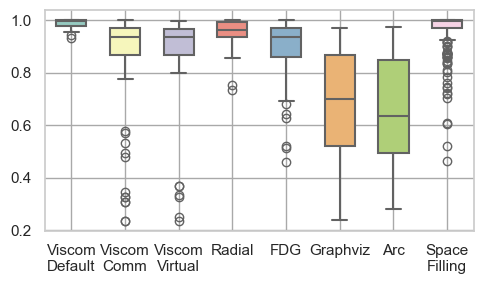

edgeCrossings


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


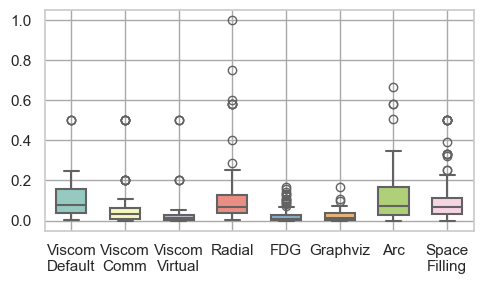

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,


totalEdgeCrossings


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


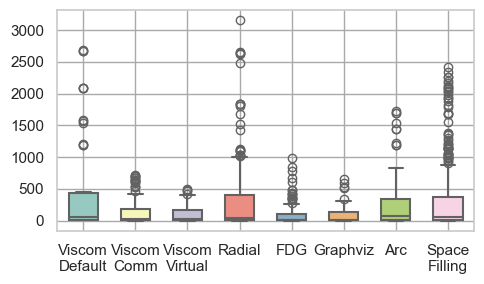

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


pathEfficiencyRatio


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


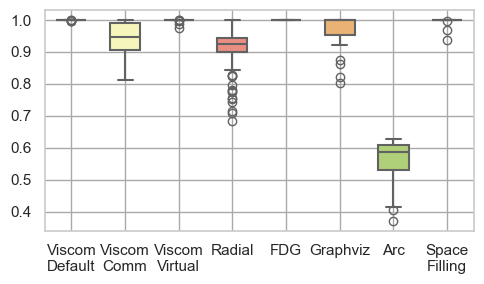

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


pathEfficiencyRatioNormalized


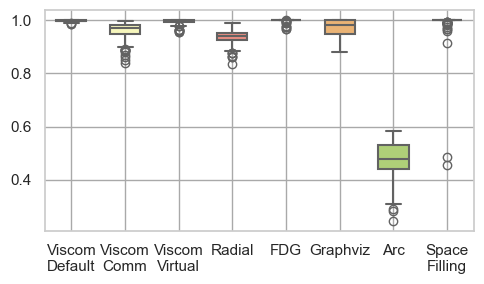

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,


stress


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


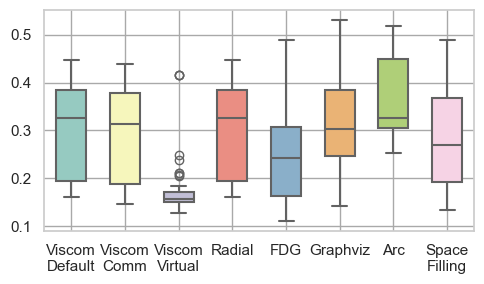

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


pathContinuity


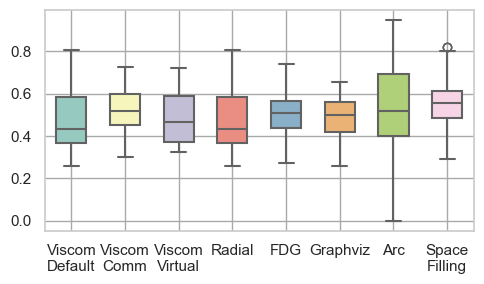

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


weightedPathContinuity


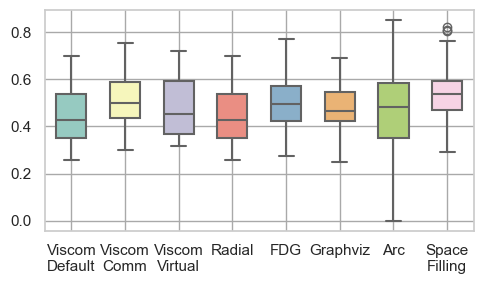

pathAngularPrediction


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


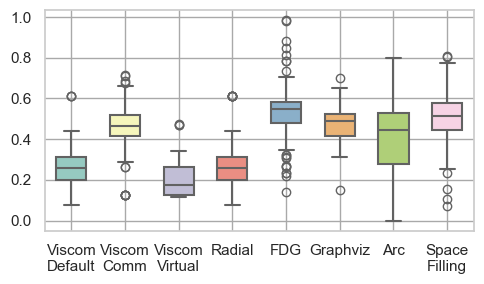

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,


nodeEdgeOverlaps


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


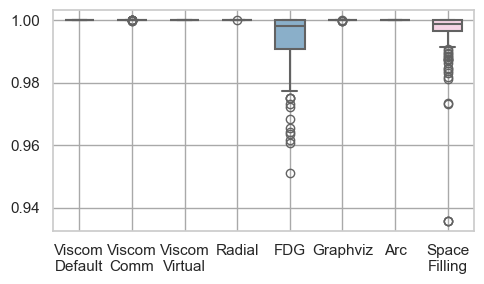

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


nodeNodeOverlaps


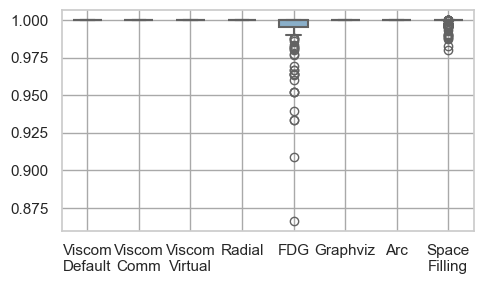

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,


totalPathLength


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


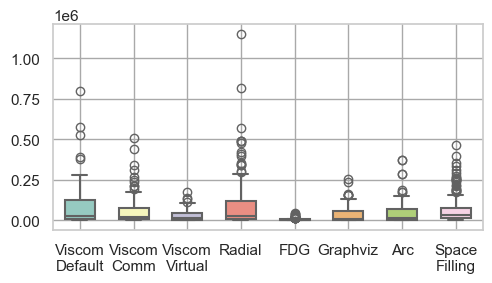

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='type', y='value', ax=ax,
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2484850729.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


synthetic


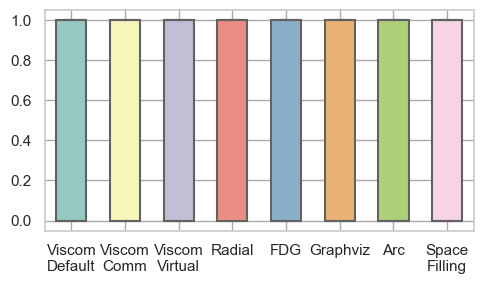

In [19]:
out_dir = "./plots"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
with_title = False

# Set the style of seaborn
sns.set(style="whitegrid")

metrics = metric_list_df['metric'].unique()
for metric in metrics:
    fig, ax = plt.subplots(figsize=(5, 3))
    subset = metric_list_df[metric_list_df['metric'] == metric]
    sns.boxplot(data=subset, x='type', y='value', ax=ax,
                fill=True, palette="Set3", linewidth=1.5, gap=0.3)
    
    if with_title:
        ax.set_title(f'{split_camel_case(metric, " ")}', fontsize=14, pad=15, weight='bold')
    else:
        ax.set_title("")
    # ax.set_xlabel('Layout Algorithm', fontsize=12)
    # ax.set_ylabel('Value', fontsize=12)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # Add a dashed grid with some transparency
    ax.grid(True, linestyle='-', alpha=1, linewidth=1, color='darkgrey')
    
    # Set x-tick labels horizontal and offset every second label slightly lower
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    labels = ax.get_xticklabels()
    new_labels = []
    for i, label in enumerate(labels):
        # Offset every second label by lowering its y-position
        # if i % 2 == 1:
        #     # The offset factor (0.05) can be adjusted as needed
        #     pos = label.get_position()
        #     label.set_y(pos[1] - 0.00)
            
        # Convert camel case to words
        text = label.get_text()
        new_text = split_camel_case(text, "\n")
        new_labels.append(new_text)
    
    ax.set_xticklabels(new_labels)
    print(metric)
    plt.tight_layout()
    plt.show()

    # Save the figure
    out_file = os.path.join(out_dir, f"{metric}.pdf")
    fig.savefig(out_file, bbox_inches='tight', format="pdf")
    # plt.close(fig)

In [20]:
metric_list_df

,type,metric,value,synthetic
0,viscomDefault,aspectRatio,0.94257,False
1,viscomDefault,aspectRatio,0.930575,False
2,viscomDefault,aspectRatio,0.960176,False
3,viscomComm,aspectRatio,0.94257,False
4,viscomComm,aspectRatio,0.94257,False
...,...,...,...,...
11227,spaceFilling,synthetic,True,True
11228,spaceFilling,synthetic,True,True
11229,spaceFilling,synthetic,True,True
11230,spaceFilling,synthetic,True,True


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


aspectRatio


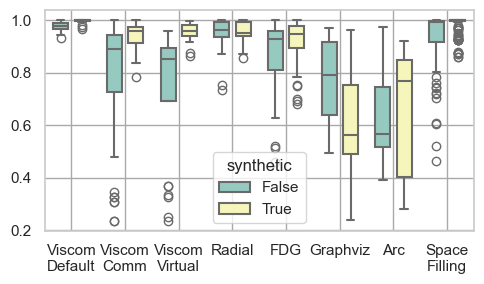

edgeCrossings


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


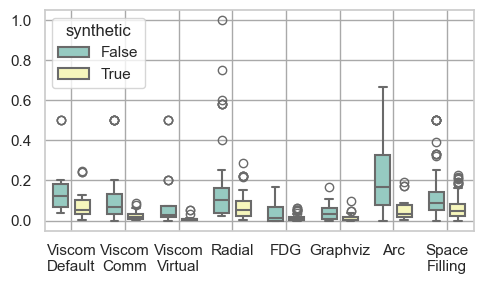

totalEdgeCrossings


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


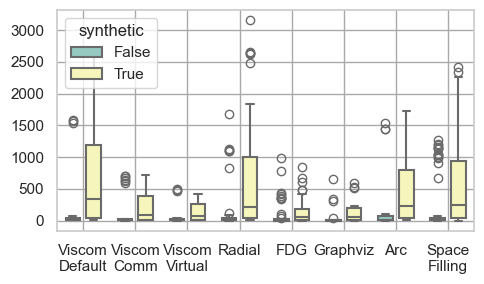

pathEfficiencyRatio


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


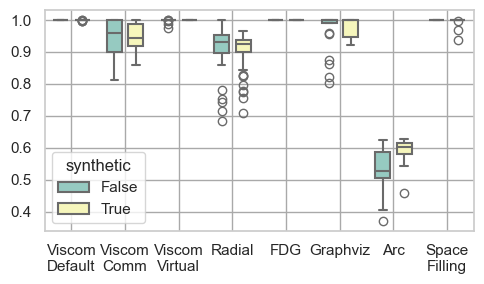

pathEfficiencyRatioNormalized


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


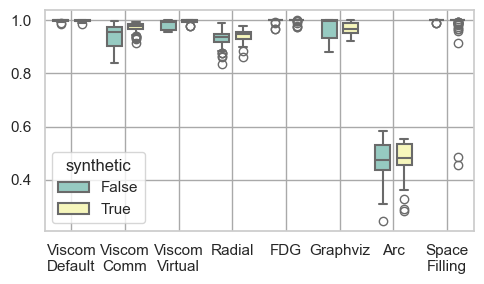

stress


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


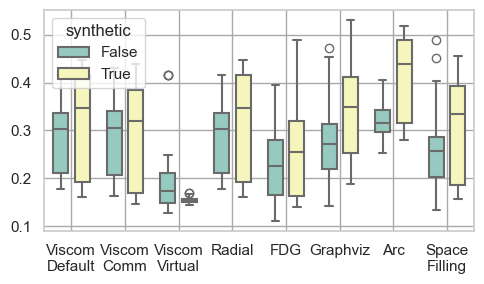

C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


pathContinuity


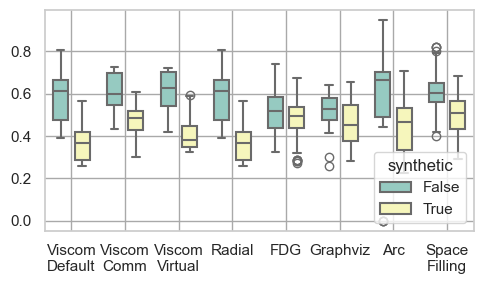

weightedPathContinuity


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


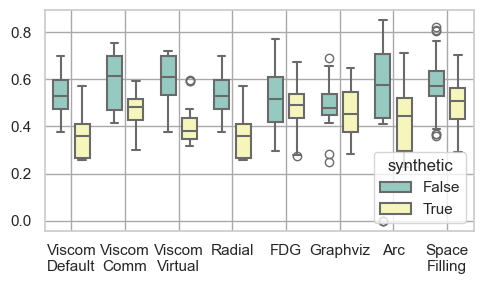

pathAngularPrediction


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


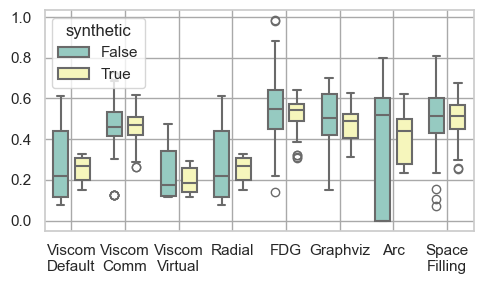

nodeEdgeOverlaps


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


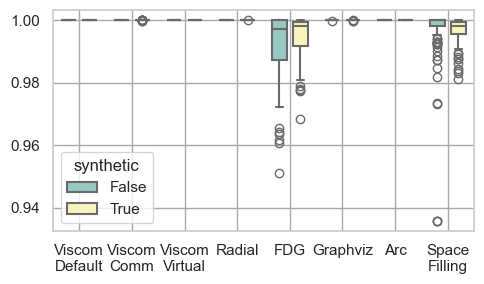

nodeNodeOverlaps


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


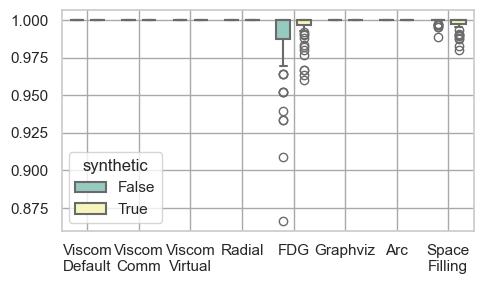

totalPathLength


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


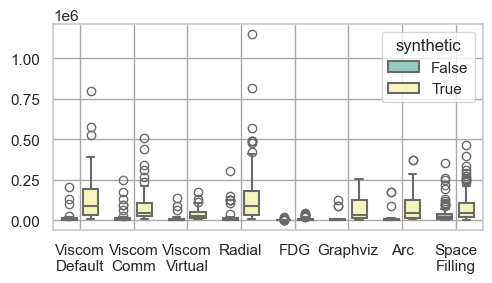

synthetic


C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\schoc\AppData\Local\Temp\ipykernel_58128\2265411692.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


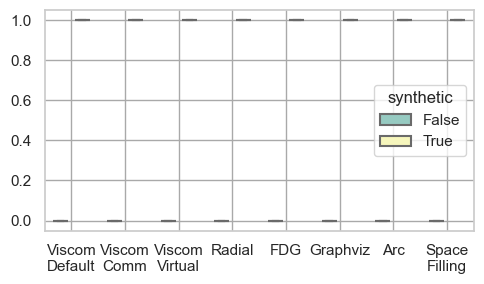

In [21]:
out_dir = "./plotsSeparated"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
with_title = False

condition_col = 'synthetic'
condition_val = True 

# Set the style of seaborn
sns.set(style="whitegrid")

metrics = metric_list_df['metric'].unique()
for metric in metrics:
    fig, ax = plt.subplots(figsize=(5, 3))
    subset = metric_list_df[metric_list_df['metric'] == metric]
    
    sns.boxplot(data=subset, x='type', y='value', ax=ax, hue="synthetic",
                fill=True, palette="Set3", linewidth=1.5, gap=0.3)
    
    if with_title:
        ax.set_title(f'{split_camel_case(metric, " ")}', fontsize=14, pad=15, weight='bold')
    else:
        ax.set_title("")
    # ax.set_xlabel('Layout Algorithm', fontsize=12)
    # ax.set_ylabel('Value', fontsize=12)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # Add a dashed grid with some transparency
    ax.grid(True, linestyle='-', alpha=1, linewidth=1, color='darkgrey')
    
    # Set x-tick labels horizontal and offset every second label slightly lower
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    labels = ax.get_xticklabels()
    new_labels = []
    for i, label in enumerate(labels):
        # Offset every second label by lowering its y-position
        # if i % 2 == 1:
        #     # The offset factor (0.05) can be adjusted as needed
        #     pos = label.get_position()
        #     label.set_y(pos[1] - 0.00)
            
        # Convert camel case to words
        text = label.get_text()
        new_text = split_camel_case(text, "\n")
        new_labels.append(new_text)
    
    ax.set_xticklabels(new_labels)
    print(metric)
    plt.tight_layout()
    plt.show()

    # Save the figure
    out_file = os.path.join(out_dir, f"{metric}.pdf")
    fig.savefig(out_file, bbox_inches='tight', format="pdf")
    # plt.close(fig)